# Planar Geometry (2-space)


## Homogeneous Representation

### Lines
An equation:

$$ax+by+c=0
$$
Represented by: $(a,b,c)^T$.  
Represents same line as $k(a,b,c)^T$

#### Intersection
point x:  
x= ${\bf l} \times {\bf l'}$

#### Line joining points

line through two point x,x':  
$x \times x'$

Intersection of parallel lines:  

two lines:${\bf l}=(a,b,c)^T$ and ${\bf l'}=(a,b,c')^T$:  


### The projective space
denoted $\mathbb{P}^2 \ is \ \mathbb{R}^3 \setminus (0,0,0)^T$

### Points
A point $x=(x,y)^T$ is in line ${\bf l}=(a,b,c)^T$ iff ax+by+c=0  
same as: $(x,y,1){\bf l}$ =0
The point is represented as $(x,y,1)^T$

### DOF
2 degrees of freedom - for x and for y (for points and lines)

## Conics
Described by the equation:
$$
ax^2 + bxy + cy^2 + dx + ey + f
$$

In "homogenized" representation:

$$
{ax_1}^2 + bx_1x_2 + {cx_2}^2 + dx_1x_3 + ex_2x_3 + {fx_3}^2
$$

in matrix form: $x^TCx=0$  
where $C  = \[
    \left[\begin{array}{}
        a & b/2 & d/2 \\
        b/2 & c & e/2 \\
        d/2 & e/2 & f \\
        \end{array}\right]
        \]$
        
### DOF
The conic has five degrees of freedom: 6 variables where we can normalize to one of them.  
equivalently: as the five ratios {a:b:c:d:e:f}

    So we need 5 points to define a conic

### line tangent to a conic

the line ${\bf l}$ is tangent to C at point x: ${\bf l} = Cx$

## Projective transformation
aka projectivity, aka homography, denoted h, is a transformation from $\mathbb{P}^2$ to itself, that preserves lines.  
i.e. three points are on the same line iff their homography is on the same line

The Mapping h(x) can be represented as $H_{3 \times 3}x$  
where H is a non singular matrix

    lines are preserved under projective transformation

### DOF
There are 9 elements in this matrix, and since applying the transformation is basically Multiplication of x in homogenous coordinates by H, there is no effect for scaling the matrix. therefore only the ratios between the elements count (we can set one of them strictly to 1).  
So there are 8 DOF.

### Finding homography (projective transformation)
we use inhomogeneous coordinates.
* choose a plane in the world.
* since x' can be computed as $H_{3 \times 3}x$, we can solve the following:  
    $$x' = \frac{x'_1}{x'_3} = \frac{h_{11}x+h_{12}y+h_{13}}{h_{31}x+h_{32}y+h_{33}}, \  \ 
    y' = \frac{x'_2}{x'_3} = \frac{h_{21}x+h_{22}y+h_{23}}{h_{31}x+h_{32}y+h_{33}}$$
* 4 points give 8 equations which is sufficient up to multiplication with factor.
* Every triplet of thes 4 points must not be collinear - they need to be in "general position"

equivalently we can solve the next system of equations:
$$PH =
    \left[\begin{array}{}
        -x_1 & -y_1 & -1 & 0 & 0 & 0 & x_1x1' & y_1x_1' & x_1' \\
        0 & 0 & 0 & -x_1 & -y_1 & -1 & x_1y_1' & y_1y_1' & y_1' \\
        -x_2 & -y_2 & -1 & 0 & 0 & 0 & x_2x2' & y_2x_2' & x_2' \\
        0 & 0 & 0 & -x_2 & -y_2 & -1 & x_2y_2' & y_2y_2' & y_2' \\
        -x_3 & -y_3 & -1 & 0 & 0 & 0 & x_3x3' & y_3x_3' & x_3' \\
        0 & 0 & 0 & -x_3 & -y_3 & -1 & x_3y_3' & y_3y_3' & y_3' \\
        -x_4 & -y_4 & -1 & 0 & 0 & 0 & x_4x4' & y_4x_4' & x_4' \\
        0 & 0 & 0 & -x_4 & -y_4 & -1 & x_4y_4' & y_4y_4' & y_4' \\
        \end{array}\right]
    \left[\begin{array}{}
        h1 \\
        h2 \\
        h3 \\
        h4 \\
        h5 \\
        h6 \\
        h7 \\
        h8 \\
        h9 \\
        \end{array}\right]
        ={\bf 0}$$



In [1]:
from sympy import*
from sympy import abc
import numpy as np
from matplotlib import pyplot as plt

# Original points
x = [622, 622, 852, 846]
y = [620, 668, 593, 640]
# mapped points
x1,y1,x2,y2 = 400,450,800,550
xp = [x1, x1, x2, x2]
yp = [y1, y2, y1, y2]

h11, h12, h13, h21, h22, h23, h31, h32, h33, x1p, x2p, x3p = symbols(
    'h11 h12 h13 h21 h22 h23 h31 h32 h33 x1p x2p x3p')

PH=Matrix([
    [-x[0],-y[0],-1,0,0,0,x[0]*xp[0],y[0]*xp[0],xp[0]],
    [0,0,0,-x[0],-y[0],-1,x[0]*yp[0],y[0]*yp[0],yp[0]],
    [-x[1],-y[1],-1,0,0,0,x[1]*xp[1],y[1]*xp[1],xp[1]],
    [0,0,0,-x[1],-y[1],-1,x[1]*yp[1],y[1]*yp[1],yp[1]],
    [-x[2],-y[2],-1,0,0,0,x[2]*xp[2],y[2]*xp[2],xp[2]],
    [0,0,0,-x[2],-y[2],-1,x[2]*yp[2],y[2]*yp[2],yp[2]],
    [-x[3],-y[3],-1,0,0,0,x[3]*xp[3],y[3]*xp[3],xp[3]],
    [0,0,0,-x[3],-y[3],-1,x[3]*yp[3],y[3]*yp[3],yp[3]]
])
H = Matrix([h11,h12,h13,h21,h22,h23,h31,h32,h33])
Hn=solve(PH*H,H)
H = np.ones((3,3))
i=0
for k,v in Hn.items():
    Hn[k]=v.evalf(subs={h33:1})
    H[i//3,i%3] = Hn[k]
    i+=1
print("H:",H)

H: [[ 1.06497730e+00 -1.51362693e-01 -2.99952688e+02]
 [ 9.19024501e-02  1.19093008e+00 -4.93344355e+02]
 [-1.50871404e-04 -3.78406732e-04  1.00000000e+00]]


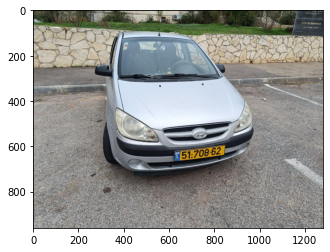

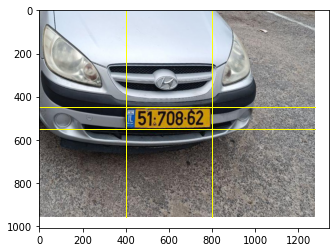

In [2]:
from skimage import transform
from numpy.linalg import inv
import matplotlib.lines as lines

im0=plt.imread("car.jpg")
plt.imshow(im0)
plt.show()

fig = plt.figure()
imt = transform.warp(im0,inv(H))
plt.imshow(imt)
plt.plot([x1,x1],[0,imt.shape[0]] ,color="yellow", linewidth=1)
plt.plot([0,imt.shape[1]],[y1,y1] ,color="yellow", linewidth=1)
plt.plot([0,imt.shape[1]],[y2,y2] ,color="yellow", linewidth=1)
plt.plot([x2,x2],[0,imt.shape[0] ],color="yellow", linewidth=1)
plt.show()

## checkout tform = transform.estimate_transform('projective', points_of_interest, projection)


In [3]:
## can also be done with transform:

pts_of_interst = np.vstack((np.array(x),np.array(y))).T
projection = np.vstack((np.array(xp),np.array(yp))).T
print(pts_of_interst)

[[622 620]
 [622 668]
 [852 593]
 [846 640]]


<Figure size 640x480 with 0 Axes>

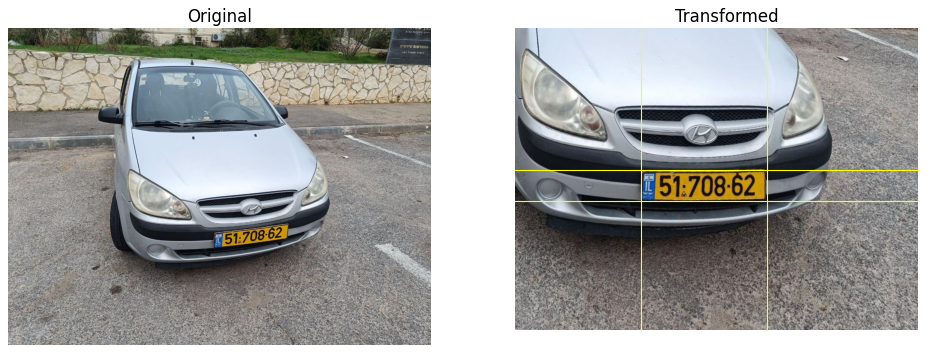

In [4]:
## can also be done with transform:

pts_of_interst = np.vstack((np.array(x),np.array(y))).T
projection = np.vstack((np.array(xp),np.array(yp))).T
tform = transform.estimate_transform('projective', pts_of_interst, projection)
tf_img_warp = transform.warp(im0, tform.inverse, mode = 'symmetric')
plt.figure(num=None, figsize=(8, 6), dpi=80)

fig, ax = plt.subplots(1,2, figsize=(15, 10), dpi = 80)
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(im0)
ax[0].set_axis_off();
ax[1].set_title(f'Transformed', fontsize = 15)
ax[1].imshow(tf_img_warp)
plt.plot([x1,x1],[0,imt.shape[0]] ,color="yellow", linewidth=1)
plt.plot([0,imt.shape[1]],[y1,y1] ,color="yellow", linewidth=1)
plt.plot([0,imt.shape[1]],[y2,y2] ,color="yellow", linewidth=1)
plt.plot([x2,x2],[0,imt.shape[0] ],color="yellow", linewidth=1)
ax[1].set_axis_off();
## full article on applying homography and image warping:
# https://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f

### Transformation of conics
Under projective transformation for points H, a conic C:  

$$ C' \rightarrow H^{-T}CH^{-1} $$


## Hierarchy of transformations

### Isometries (Euclidean)

* preserve Euclidean distance.
* Rotation/translation
* Form:  

$$
    \left(\begin{array}{}
        x' \\
        y'\\
        1\\
        \end{array}\right)=\left[\begin{array}{}
        \epsilon cos \theta & -sin\theta & t_x \\
        \epsilon sin \theta & cos\theta & t_y \\
        0 & 0 & 1 \\
        \end{array}\right]
    \left(\begin{array}{}
        x \\
        y\\
        1\\
        \end{array}\right)\\
        \epsilon=\pm1$$
* block form:  

$$
    \left[\begin{array}{}
        R & {\bf t} \\
        {\bf 0^T} & 1\\
        \end{array}\right]$$

* if $\epsilon=1$ then it preserves orientation, otherwise the orientation is reversed
* has 3 DOF
* Invariants: length, angle, area
* can be computed from 2 point correspondances


### similarity
* preserves shapes
* translation/rotatioin/isotropic scaling (isotropic: same in all directions)

* Form:  

$$
    \left(\begin{array}{}
        x' \\
        y'\\
        1\\
        \end{array}\right)=\left[\begin{array}{}
        s cos \theta & -s sin\theta & t_x \\
        s sin \theta & s cos\theta & t_y \\
        0 & 0 & 1 \\
        \end{array}\right]
    \left(\begin{array}{}
        x \\
        y\\
        1\\
        \end{array}\right)$$
        
* block form:  

$$
    \left[\begin{array}{}
        sR & {\bf t} \\
        {\bf 0^T} & 1\\
        \end{array}\right]$$

* has 4 DOF
* Invariants: length-ratios(length is not preserved), angle (parallel lines stay parallel), ratios of areas
* can be computed from 2 point correspondances

### Affine
* translation/rotation/non-isotropic scaling

* Form:  

$$
    \left(\begin{array}{}
        x' \\
        y'\\
        1\\
        \end{array}\right)=\left[\begin{array}{}
        a_{11} & a_{12} & t_x \\
        a_{21} & a_{22} & t_y \\
        0 & 0 & 1 \\
        \end{array}\right]
    \left(\begin{array}{}
        x \\
        y\\
        1\\
        \end{array}\right)$$
* block form:  

$$
    \left[\begin{array}{}
        A & {\bf t} \\
        {\bf 0^T} & 1\\
        \end{array}\right]$$
* A is 2x2 non-singular matrix of the form:  

$$ A = R(\theta)R(-\phi)DR(\phi) \\
    R(x)=\left[\begin{array}{}
        cosx & -sinx \\
        sinx & cosx \\
        \end{array}\right] \ , \ 
    D=\left[\begin{array}{}
        \lambda_1 & 0 \\
        0 & \lambda_2 \\
        \end{array}\right]$$
* This decomposition shows the pipeline: rotation by $\phi$, non-isometric scaling by the two lambdas, rotation back, and finally rotation by $\phi$
 
* has 6 DOF: two for translation, one for rotation, two for isometric scaling, and one for the rotation in the scaling stage (the scaling direction $\phi$)
* Invariants: 
    * Parallel lines stay parallel
    * Ratio of lengths of parallel line segments
    * Ratio of areas
* sign of $|A|$ determines orientation preservation
* can be computed from 3 point correspondances


### Projectivity (projective transformation)
* general non-singular linear transformation with inhomogeneous coordinates, with translation.

* Form:  

$$
    \left(\begin{array}{}
        x' \\
        y'\\
        1\\
        \end{array}\right)=\left[\begin{array}{}
        a_{11} & a_{12} & t_x \\
        a_{21} & a_{22} & t_y \\
        v_1 & v_2 & h_{33} \\
        \end{array}\right]
    \left(\begin{array}{}
        x \\
        y\\
        1\\
        \end{array}\right)$$
* block form:  

$$
    \left[\begin{array}{}
        A & {\bf t} \\
        {\bf v^T} & h_{33} \\
        \end{array}\right]$$  
        
* $h_{33}$ can be 0 so we can't always scale by it
 
* has 8 DOF
* Invariants: 
    * cross ratio of 4 collinear points: ratio of **ratios** of lengths on a line
* sign of $|A|$ determines orientation preservation
* can be computed from 4 point correspondances - where each 3 are not collinear
* Decomposition:  

$$
H = H_SH_AH_P = \left[\begin{array}{}
        sR & {\bf t} \\
        {\bf 0^T} & 1 \\
        \end{array}\right]
    \left[\begin{array}{}
        K & {\bf 0} \\
        {\bf 0^T} & 1 \\
        \end{array}\right]
    \left[\begin{array}{}
        I & 0 \\
        {\bf v^T} & h_33 \\
        \end{array}\right]\\
        A = sRK+{\bf tv^T}, \ \
$$
K upper tirangular matrix with normalized det: $|K|=1$


## Cross Ratio

cross ratio is invariant to projective transformation, and relates to collinear points, so we can approach it in $\mathbb{P}^1$
given 4 points x_i = $(x_{i_1},x_{i_2})^T:
$$Cross(x_1,x_2,x_3,x_4) = \frac{|x_1x_2||x_3x_4|}{|x_1x_3||x_2x_4|}$$